In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Cel ML: analiza szans na wypadek lotniczy Cel aplikacji: predykcja bezpiecznego lotu

In [2]:
df = pd.read_csv("AviationData2.csv")
df.head()


/var/folders/rr/3tz5xt4j16s1wvxsg7zr8hg80000gn/T/ipykernel_2570/2001571506.py:1: DtypeWarning: Columns (6,7,23,28,31,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AviationData2.csv")


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Broad.phase.of.flight,Report.Status,Publication.Date,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Cruise,Probable Cause,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Unknown,Probable Cause,19-09-1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Cruise,Probable Cause,26-02-2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Cruise,Probable Cause,12-09-2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Approach,Probable Cause,16-04-1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_no_column = df.drop(['Event.Id', 'Investigation.Type', 'Accident.Number','Latitude', 'Longitude', 'Airport.Code','Airport.Name', 'Registration.Number', 'FAR.Description', 'Schedule', 'Air.carrier','Publication.Date', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37'], axis=1)

In [4]:
df_no_column.head()

,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause


In [7]:
df["Aircraft.damage"].unique()

array(['Destroyed', 'Substantial', 'Minor', nan, 'Fatal(2)', 'Unknown'],
      dtype=object)

In [8]:
df['Make'] = df['Make'].str.lower()

In [9]:
df["Make"].unique()

array(['stinson', 'piper', 'cessna', ..., 'james r dernovsek',
       'orlican s r o', 'royse ralph l'], dtype=object)

In [10]:
us_df = df_no_column[df_no_column['Country'] == 'United States']

In [11]:
us_df.to_csv('us_df.csv', index=False)

In [26]:
df_no_column.to_csv('df_no_column.csv', index=False)

In [6]:
# Calculate the number of missing values in each row
missing_values_count = df.isnull().sum(axis=1)

# Sort the rows based on the count of missing values
sorted_rows = df.loc[missing_values_count.sort_values(ascending=False).index]

# Select the rows with the highest count of missing values
rows_with_most_missing_values = sorted_rows.head(10)

# Print the rows with the most missing values
print(rows_with_most_missing_values)


       Event.Date                Location         Country Injury.Severity  \
58803  2005-06-10         Canada/US borde             NaN        Incident   
53640  2002-10-11                     NaN       Australia        Incident   
49759  2000-11-28          Nairobi, Kenya           Kenya        Incident   
61788  2006-12-07  London, United Kingdom  United Kingdom        Incident   
62530  2007-05-13          London Control             NaN        Incident   
61437  2006-09-18     Brisbane, Australia       Australia        Incident   
50016  2001-01-30                     NaN       Australia        Incident   
61431  2006-09-17                     NaN         Iceland        Incident   
61405  2006-09-12   Auckland, New Zealand     New Zealand        Incident   
60290  2006-03-05         Dublin, Ireland         Ireland        Incident   

      Aircraft.damage Aircraft.Category                   Make      Model  \
58803             NaN               NaN                    NaN        NaN  

In [30]:
# Create a data frame with rows containing 'United States' in the 'Country' column
us_df = df_no_column[df_no_column['Country'] == 'United States']

# Create a data frame with rows not containing 'United States' in the 'Country' column
non_us_df = df_no_column[df_no_column['Country'] != 'United States']

In [31]:
us_df.shape

(82248, 19)

In [32]:
us_df.to_csv('us_df.csv', index=False)

In [9]:
us_df.isnull().sum()

Event.Date                    0
Location                     11
Country                       0
Injury.Severity             108
Aircraft.damage            1979
Aircraft.Category         54092
Make                         21
Model                        38
Amateur.Built                21
Number.of.Engines          1874
Engine.Type                3024
Purpose.of.flight          2432
Total.Fatal.Injuries      10656
Total.Serious.Injuries    11374
Total.Minor.Injuries      10729
Total.Uninjured            5006
Weather.Condition           646
Broad.phase.of.flight     21088
Report.Status              2613
dtype: int64

In [33]:
non_us_df.shape

(6641, 19)

In [34]:
non_us_df.to_csv('non_us_df.csv', index=False)

In [10]:
non_us_df.isnull().sum()

Event.Date                   0
Location                    41
Country                    226
Injury.Severity            892
Aircraft.damage           1215
Aircraft.Category         2508
Make                        42
Model                       54
Amateur.Built               81
Number.of.Engines         4209
Engine.Type               4054
Purpose.of.flight         3763
Total.Fatal.Injuries       747
Total.Serious.Injuries    1135
Total.Minor.Injuries      1204
Total.Uninjured            907
Weather.Condition         3846
Broad.phase.of.flight     6075
Report.Status             3771
dtype: int64

In [ ]:
#EDA

In [15]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Find the row in the 'Amateur.Built' column that has a value of 172
b

# Print the row
print(row_with_value_172)


       Event.Date       Location        Country  Injury.Severity  \
55329  2003-08-19  CLEVELAND, OH  United States  BURKE LAKEFRONT   

      Aircraft.damage Aircraft.Category    Make   Model Amateur.Built  \
55329       Non-Fatal       Substantial  N229ME  Cessna           172   

      Number.of.Engines Engine.Type Purpose.of.flight Total.Fatal.Injuries  \
55329                No           1               NaN                  NaN   

       Total.Serious.Injuries  Total.Minor.Injuries  Total.Uninjured  \
55329                     NaN                   NaN              NaN   

      Weather.Condition Broad.phase.of.flight Report.Status  
55329                 2                   VMC       Landing  


In [4]:
df["Investigation.Type"].unique()

array(['Accident', 'Incident'], dtype=object)

In [5]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date', 'Unnamed: 31'],
      dtype='object')

In [18]:
df["Aircraft.damage"].value_counts()

Substantial    64146
Destroyed      18622
Minor           2805
Unknown          119
Non-Fatal          2
Fatal(2)           1
Name: Aircraft.damage, dtype: int64

In [3]:
df['Make'].value_counts()

Cessna              22226
Piper               12029
CESSNA               4922
Beech                4329
PIPER                2841
                    ...  
Kirchner                1
1977 Colfer-chan        1
Leonard Walters         1
Maule Air Inc.          1
ROYSE RALPH L           1
Name: Make, Length: 8240, dtype: int64

In [6]:
df['Total.Fatal.Injuries'].value_counts()

0.0      33457
0        26214
1.0       5652
2.0       3307
1         3230
         ...  
35.0         1
29.0         1
125.0        1
70.0         1
62           1
Name: Total.Fatal.Injuries, Length: 164, dtype: int64

In [7]:
df['Total.Fatal.Injuries'].unique()

array(['2', '4', '3', '1', nan, '0', '8', '78', '7', '6', '5', '153',
       '12', '14', '23', '10', '11', '9', '17', '13', '29', '70',
       '(dba: Kenai Helicopters)', '135', '31', '256', '25', '82', 0.0,
       2.0, 1.0, 4.0, 3.0, 5.0, 6.0, 10.0, 9.0, 156.0, 28.0, 8.0, 18.0,
       43.0, 15.0, 12.0, 7.0, 14.0, 270.0, 144.0, 174.0, 11.0, 111.0,
       131.0, 20.0, 73.0, 27.0, 34.0, 25.0, 23.0, 13.0, 87.0, 30.0, 16.0,
       47.0, 56.0, 37.0, 132.0, 68.0, 54.0, 52.0, 65.0, 72.0, 160.0,
       189.0, 123.0, 33.0, 110.0, 230.0, 70.0, 97.0, 349.0, 125.0, 29.0,
       35.0, 228.0, 75.0, 104.0, 229.0, 80.0, 217.0, 169.0, 88.0, 19.0,
       60.0, 113.0, 143.0, 83.0, 24.0, 44.0, 64.0, 92.0, 118.0, 265.0,
       26.0, 138.0, 206.0, 71.0, 21.0, 46.0, 102.0, 115.0, 141.0, 55.0,
       121.0, 45.0, 145.0, 117.0, 107.0, 124.0, 49.0, 154.0, 96.0, 114.0,
       199.0, 89.0, 57.0, 17.0, '24', '49', '228', '152', '90', '89',
       '103', '158', '157', '42', '21', '77',
       ' pending outcome of t

In [17]:
df["Aircraft.damage"].unique()

array(['Destroyed', 'Substantial', 'Minor', nan, 'Non-Fatal', 'Fatal(2)',
       'Unknown'], dtype=object)

In [19]:
df['FAR.Description'].unique()

array([nan, 'Part 129: Foreign', 'Part 91: General Aviation',
       'Part 135: Air Taxi & Commuter', 'Part 125: 20+ Pax,6000+ lbs',
       'Part 121: Air Carrier', 'Part 137: Agricultural',
       'Part 133: Rotorcraft Ext. Load', 'Unknown',
       'Part 91F: Special Flt Ops.', 'Turbo Shaft',
       'Non-U.S., Non-Commercial', 'Public Aircraft',
       'Non-U.S., Commercial', 'Reciprocating', 'Public Use',
       'Turbo Prop', 'Armed Forces', 'Part 91 Subpart K: Fractional',
       '91', 'NUSC', '135', 'NUSN', '121', '137', '129', '133', '091K',
       'UNK', 'PUBU', 'ARMF', '103', '125', '437', '107'], dtype=object)

In [20]:
df['Make'].unique()

array(['Stinson', 'Piper', 'Cessna', ..., 'JAMES R DERNOVSEK',
       'ORLICAN S R O', 'ROYSE RALPH L'], dtype=object)

In [6]:
df['Injury.Severity'].unique()

array(['Fatal(2)', 'Fatal(4)', 'Fatal(3)', 'Fatal(1)', 'Non-Fatal',
       'Incident', 'Fatal(8)', 'Fatal(78)', 'Fatal(7)', 'Fatal(6)',
       'Fatal(5)', 'Fatal(153)', 'Fatal(12)', 'Fatal(14)', 'Fatal(23)',
       'Fatal(10)', 'Fatal(11)', 'Fatal(9)', 'Fatal(17)', 'Fatal(13)',
       'Fatal(29)', 'Fatal(70)', 'Unavailable', 'O', 'Fatal(135)',
       'Fatal(31)', 'Fatal(256)', 'Fatal(25)', 'Fatal(82)', 'Fatal(156)',
       'Fatal(28)', 'Fatal(18)', 'Fatal(43)', 'Fatal(15)', 'Fatal(270)',
       'Fatal(144)', 'Fatal(174)', 'Fatal(111)', 'Fatal(131)',
       'Fatal(20)', 'Fatal(73)', 'Fatal(27)', 'Fatal(34)', 'Fatal(87)',
       'Fatal(30)', 'Fatal(16)', 'Fatal(47)', 'Fatal(56)', 'Fatal(37)',
       'Fatal(132)', 'Fatal(68)', 'Fatal(54)', 'Fatal(52)', 'Fatal(65)',
       'Fatal(72)', 'Fatal(160)', 'Fatal(189)', 'Fatal(123)', 'Fatal(33)',
       'Fatal(110)', 'Fatal(230)', 'Fatal(97)', 'Fatal(349)',
       'Fatal(125)', 'Fatal(35)', 'Fatal(228)', 'Fatal(75)', 'Fatal(104)',
       'Fatal(2

In [42]:
df.isnull().sum()

Investigation.Type            0
Event.Date                    0
Location                     52
Country                       0
Airport.Code              38640
Airport.Name              36100
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56600
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6087
Engine.Type                7078
FAR.Description           56863
Schedule                  76307
Purpose.of.flight          6195
Air.carrier               72238
Total.Fatal.Injuries      11407
Total.Serious.Injuries    12509
Total.Minor.Injuries      11933
Total.Uninjured            5913
Weather.Condition          4492
Broad.phase.of.flight     27163
Report.Status              6384
Publication.Date          13771
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      88889 non-null  object 
 1   Event.Date              88889 non-null  object 
 2   Location                88837 non-null  object 
 3   Country                 88663 non-null  object 
 4   Airport.Code            50249 non-null  object 
 5   Airport.Name            52789 non-null  object 
 6   Injury.Severity         87889 non-null  object 
 7   Aircraft.damage         85695 non-null  object 
 8   Aircraft.Category       32289 non-null  object 
 9   Make                    88826 non-null  object 
 10  Model                   88797 non-null  object 
 11  Amateur.Built           88787 non-null  object 
 12  Number.of.Engines       82806 non-null  object 
 13  Engine.Type             81811 non-null  object 
 14  FAR.Description         32026 non-null

In [27]:
import pandas_profiling as pp

In [37]:
profile = pp.ProfileReport(non_us_df)

In [38]:
profile.to_file("non_us_df.html")

/Users/smarta/opt/anaconda3/lib/python3.9/site-packages/multimethod/__init__.py:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self[tuple(map(self.get_type, args))](*args, **kwargs)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# UNIFORM

In [10]:
# Convert all names to lowercase
df['Airport.Name'] = df['Airport.Name'].str.lower()

In [12]:
df['Airport.Name'] = df['Airport.Name'].replace(r'^private.*', 'Private', regex=True)

In [13]:
df['Airport.Name'].value_counts()

Private                           1044
none                               232
merrill field                      109
centennial                         102
van nuys                            97
                                  ... 
lower loon creek airstrip            1
on the rocks airstrip                1
meriden-markham                      1
saint louis regional                 1
wichita dwight d eisenhower nt       1
Name: Airport.Name, Length: 21504, dtype: int64

In [18]:
# Convert all names to lowercase
df['Make'] = df['Make'].str.lower()

# Replace specific variations with the desired name
df['Make'] = df['Make'].replace('cessna', 'Cessna')

In [19]:
# If you have multiple variations, you can use regular expressions or other techniques
# For example, to replace any variation of 'cessna' with 'Cessna', you can use:
df['Make'] = df['Make'].replace(r'^cessna.*', 'Cessna', regex=True)

In [20]:
# Verify the changes
df['Make'].value_counts()

Cessna           27211
piper            14870
beech             5371
boeing            2745
bell              2721
                 ...  
cohen                1
kitchens             1
lutes                1
izatt                1
royse ralph l        1
Name: Make, Length: 7577, dtype: int64

In [23]:
top_20_make_counts = df['Make'].value_counts().head(40)
print(top_20_make_counts)

Cessna                         27211
piper                          14870
beech                           5371
boeing                          2745
bell                            2721
mooney                          1334
robinson                        1230
grumman                         1172
bellanca                        1045
hughes                           932
schweizer                        773
air tractor                      691
aeronca                          636
mcdonnell douglas                608
maule                            589
champion                         519
stinson                          439
aero commander                   429
de havilland                     422
luscombe                         414
aerospatiale                     388
north american                   383
taylorcraft                      383
rockwell                         355
hiller                           348
enstrom                          296
airbus                           291
d

In [30]:
top_20_make_counts = df['Number.of.Engines'].value_counts().head(40)
print(top_20_make_counts)

1.0    69580
2.0    11078
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: Number.of.Engines, dtype: int64


In [32]:
df['FAR.Description'] = df['FAR.Description'].replace(r'.*129.*', 'Part 129: Foreign', regex=True)
# Verify the changes
print(df['FAR.Description'].unique())

[nan 'Part 129: Foreign' 'Part 91: General Aviation'
 'Part 135: Air Taxi & Commuter' 'Part 125: 20+ Pax,6000+ lbs'
 'Part 121: Air Carrier' 'Part 137: Agricultural'
 'Part 133: Rotorcraft Ext. Load' 'Unknown' 'Part 91F: Special Flt Ops.'
 'Turbo Shaft' 'Non-U.S., Non-Commercial' 'Public Aircraft'
 'Non-U.S., Commercial' 'Reciprocating' 'Public Use' 'Turbo Prop'
 'Armed Forces' 'Part 91 Subpart K: Fractional' '91' 'NUSC' '135' 'NUSN'
 '121' '137' '133' '091K' 'UNK' 'PUBU' 'ARMF' '103' '125' '437' '107']


In [34]:
df['FAR.Description'] = df['FAR.Description'].replace(r'.*91.*', 'Part 91: General Aviation', regex=True)

In [36]:
df['FAR.Description'] = df['FAR.Description'].replace(r'.*137.*', 'Part 137: Agricultural', regex=True)

In [37]:
top_20_make_counts = df['FAR.Description'].value_counts().head(40)
print(top_20_make_counts)

Part 91: General Aviation         24722
NUSN                               1584
Part 137: Agricultural             1447
NUSC                               1013
135                                 746
121                                 679
UNK                                 371
Part 129: Foreign                   346
Part 135: Air Taxi & Commuter       298
PUBU                                253
Part 121: Air Carrier               165
133                                 107
Non-U.S., Non-Commercial             97
Non-U.S., Commercial                 93
Part 133: Rotorcraft Ext. Load       32
Unknown                              22
Public Use                           19
ARMF                                  8
125                                   5
Part 125: 20+ Pax,6000+ lbs           5
107                                   4
Reciprocating                         2
Public Aircraft                       2
103                                   2
Armed Forces                          1


In [ ]:
# CHANGING DATA TYPE

In [25]:
# Convert non-numeric values to NaN
df['Total.Fatal.Injuries'] = pd.to_numeric(df['Total.Fatal.Injuries'], errors='coerce')

# Transform to float
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].astype(float)

# Verify the data type transformation
print(df['Total.Fatal.Injuries'].dtype)


float64


In [28]:
# Convert non-numeric values to NaN
df['Number.of.Engines'] = pd.to_numeric(df['Number.of.Engines'], errors='coerce')

# Transform to float
df['Number.of.Engines'] = df['Number.of.Engines'].astype(float)

# Verify the data type transformation
print(df['Number.of.Engines'].dtype)


float64


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      88889 non-null  object 
 1   Event.Date              88889 non-null  object 
 2   Location                88837 non-null  object 
 3   Country                 88663 non-null  object 
 4   Airport.Code            50249 non-null  object 
 5   Airport.Name            52789 non-null  object 
 6   Injury.Severity         87889 non-null  object 
 7   Aircraft.damage         85695 non-null  object 
 8   Aircraft.Category       32289 non-null  object 
 9   Make                    88826 non-null  object 
 10  Model                   88797 non-null  object 
 11  Amateur.Built           88787 non-null  object 
 12  Number.of.Engines       82802 non-null  float64
 13  Engine.Type             81811 non-null  object 
 14  FAR.Description         32026 non-null

In [ ]:
# MISSING VALUES

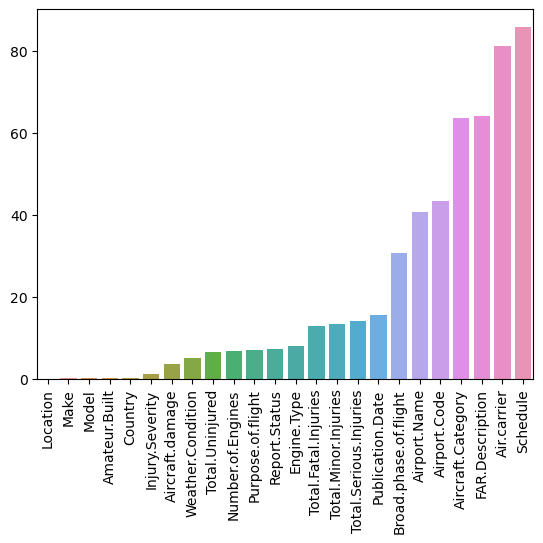

In [13]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan
percent_nan = percent_missing(df)

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);


In [38]:
# null countries are outside US
df[df['Country'].isnull()]
df['Country'].fillna('Foreign', inplace=True)


In [41]:
df['Country'].unique()

array(['United States', 'Foreign', 'GULF OF MEXICO', 'Puerto Rico',
       'ATLANTIC OCEAN', 'HIGH ISLAND', 'Bahamas', 'MISSING', 'Pakistan',
       'Angola', 'Germany', 'Korea, Republic Of', 'Martinique',
       'American Samoa', 'PACIFIC OCEAN', 'Canada', 'Bolivia', 'Mexico',
       'Dominica', 'Netherlands Antilles', 'Iceland', 'Greece', 'Guam',
       'Australia', 'CARIBBEAN SEA', 'West Indies', 'Japan',
       'Philippines', 'Venezuela', 'Bermuda', 'San Juan Islands',
       'Colombia', 'El Salvador', 'United Kingdom',
       'British Virgin Islands', 'Netherlands', 'Costa Rica',
       'Mozambique', 'Jamaica', 'Panama', 'Guyana', 'Norway', 'Hong Kong',
       'Portugal', 'Malaysia', 'Turks And Caicos Islands',
       'Northern Mariana Islands', 'Dominican Republic', 'Suriname',
       'Honduras', 'Congo', 'Belize', 'Guatemala', 'Anguilla', 'France',
       'St Vincent And The Grenadines', 'Haiti', 'Montserrat',
       'Papua New Guinea', 'Cayman Islands', 'Sweden', 'Taiwan',
    